# This is research to test whether the variables last_oil_price, mid_USD_rate and inflation influence oil_export volume in Indonesia. The test uses regression calculations by taking sample data from 2021 to 2023. The data is downloaded from the BPS, BI and investing websites.

# 1. Preparation of Data

# Import all of libraries that is required

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from math import log
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
%matplotlib inline

#Read in the export_oil csv file as DataFrame called oil_indonesia

In [ ]:
oil_indonesia = pd.read_csv("/content/export_oil.csv")

#Check the head of oil_indonesia

In [ ]:
oil_indonesia.head()

,last_oil_price,mid_USD_rate,oil_export,inflation
0,51.56,13662.0,815.3,0.0268
1,44.76,14234.0,805.2,0.0298
2,20.48,16367.0,617.4,0.0296
3,18.84,15157.0,562.1,0.0267
4,35.49,14733.0,560.9,0.0219


#Check the oil_indonesia table's shape

In [ ]:
oil_indonesia.shape

(48, 5)

#Check the oil_indonesia info

In [ ]:
oil_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   end_month       48 non-null     object 
 1   last_oil_price  48 non-null     float64
 2   mid_USD_rate    48 non-null     int64  
 3   oil_export      48 non-null     float64
 4   inflation       48 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.0+ KB


# Change data type mid_USD_rate to float64 type

In [ ]:
oil_indonesia['mid_USD_rate'] = oil_indonesia['mid_USD_rate'].astype('float64')

In [ ]:
oil_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   end_month       48 non-null     object 
 1   last_oil_price  48 non-null     float64
 2   mid_USD_rate    48 non-null     float64
 3   oil_export      48 non-null     float64
 4   inflation       48 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


#Check null value in oil_indonesia

In [ ]:
print(oil_indonesia.isnull().sum())

end_month         0
last_oil_price    0
mid_USD_rate      0
oil_export        0
inflation         0
dtype: int64


# Check possibility duplicated value in oil_indonesia

In [ ]:
oil_indonesia.duplicated().sum()

0

#Drop "end_month" column that it is useless for regression calculation

In [ ]:
oil_indonesia.drop(['end_month'],axis=1,inplace=True)

# Check the oil_indonesia describe methods

In [ ]:
oil_indonesia.describe()

,last_oil_price,mid_USD_rate,oil_export,inflation
count,48.000000,48.000000,48.000000,48.000000
mean,69.608542,14776.416667,1061.262500,0.028981
std,22.174758,554.931463,342.029537,0.014455
min,18.840000,13662.000000,0.000000,0.013200
25%,52.040000,14346.750000,849.275000,0.015975
50%,74.580000,14671.500000,1066.150000,0.026050
75%,82.242500,15101.500000,1311.150000,0.038500
max,114.670000,16367.000000,1662.900000,0.059500


# 2. Exploratory Data Analysis

# Use heatmap to recreate the plot below

,last_oil_price,mid_USD_rate,oil_export,inflation
last_oil_price,1.000000,0.073903,0.755607,0.458852
mid_USD_rate,0.073903,1.000000,0.156464,0.545627
oil_export,0.755607,0.156464,1.000000,0.541510
inflation,0.458852,0.545627,0.541510,1.000000


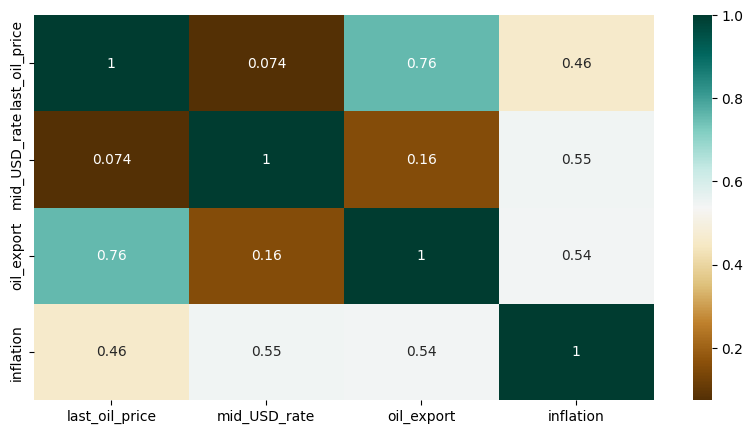

In [ ]:
plt.figure(figsize=(10,5))
c = oil_indonesia.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Use pairplot to recreate the plot below

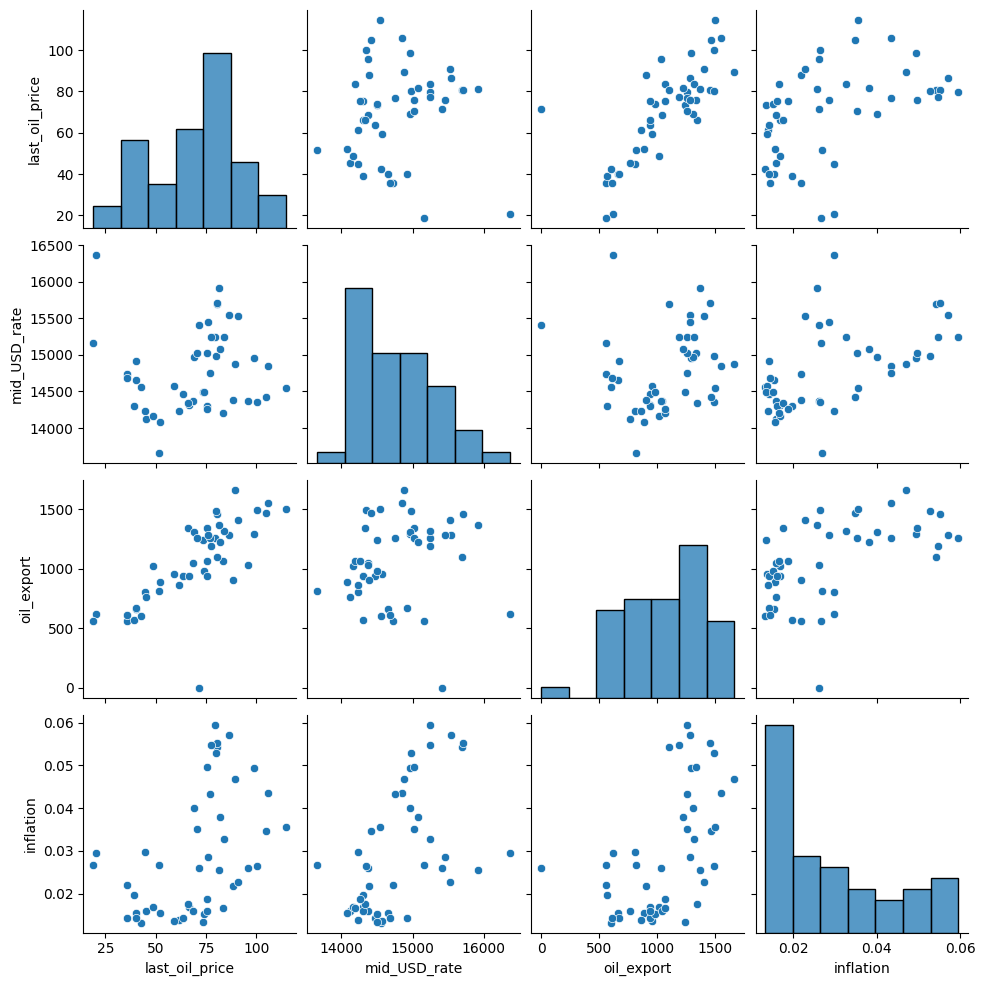

In [ ]:
sns.pairplot(oil_indonesia)

# Create a linear model plot (using seaborn lmplot) inflation vs oil_export

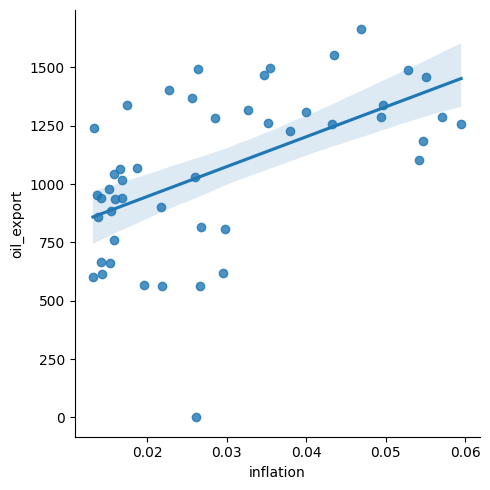

In [ ]:
sns.lmplot(x='inflation', y="oil_export", data=oil_indonesia)

# 3. Training and Testing Data

# Set variable X equal to the numerical features of the oil _indonesia and a variable y equal to the oil_export column

In [ ]:
X = oil_indonesia.drop(['oil_export'],axis=1)

In [ ]:
y = oil_indonesia['oil_export']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Import cross validation train_test_split from sklearn

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets. Set test size=0.2 and random test=0

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# 4. Training the Model

# Import linear regression from sklearn.linear_model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a instance of a LinearRegression model named lm

In [ ]:
lm = LinearRegression()

# Train/fit lm on the training data

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

# Print out the coefficients of the model

In [ ]:
lm.coef_

array([200.44050601, -10.80755483, 121.11087484])

# Print out the X_test

In [ ]:
prediction = lm.predict(X_test)
prediction

array([1528.45452188,  705.9208487 , 1343.42451644, 1511.02483507,
       1416.10915511, 1357.42519896, 1372.09041617, 1159.72902241,
        700.81715592,  757.00143871])

# 5. Predicting the Test Data

# Create a scatterplot of the real test values vs the predicted values

Text(0, 0.5, 'predicted values')

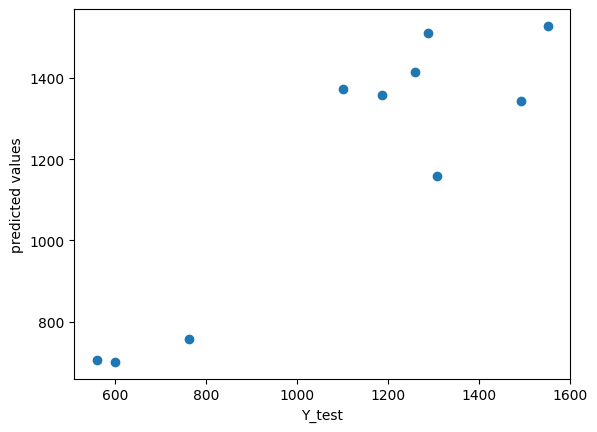

In [ ]:
plt.scatter(y_test, prediction)
plt.xlabel("Y_test")
plt.ylabel('predicted values')

# 6. Evaluating the Model

# Calculate the mean_absolute_error, mean_squared_error and metrics.mean_squared_error for normalization of data

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test, prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 139.51781104780872
MSE 25329.345231343865
RMSE 159.15195641695348


# Print out the R square value for deteminate how accurate the model in prediction

In [ ]:
metrics.explained_variance_score(y_test,prediction)

0.8234756635987014

# Print head of independent variable(X) from oil_indonesia DataFramePrint head of independent variable(X) from oil_indonesia DataFrame

In [ ]:
X = oil_indonesia.drop(["oil_export"],axis=1)
X.head()

,last_oil_price,mid_USD_rate,inflation
0,51.56,13662.0,0.0268
1,44.76,14234.0,0.0298
2,20.48,16367.0,0.0296
3,18.84,15157.0,0.0267
4,35.49,14733.0,0.0219


# Print head of independent variable(y) from oil_indonesia DataFrame

In [ ]:
y = oil_indonesia['oil_export']
y.head()

0    815.3
1    805.2
2    617.4
3    562.1
4    560.9
Name: oil_export, dtype: float64

# Add constant in X variable

In [ ]:
X = sm.add_constant(X)
X.head()

,const,last_oil_price,mid_USD_rate,inflation
0,1.0,51.56,13662.0,0.0268
1,1.0,44.76,14234.0,0.0298
2,1.0,20.48,16367.0,0.0296
3,1.0,18.84,15157.0,0.0267
4,1.0,35.49,14733.0,0.0219


# Print OLS Regression Result in watching performance of regression model

In [ ]:
OLS =  sm.OLS(endog = y, exog = X).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             oil_export   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     23.93
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.44e-09
Time:                        10:50:40   Log-Likelihood:                -324.46
No. Observations:                  48   AIC:                             656.9
Df Residuals:                      44   BIC:                             664.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            546.7744   1021.789      0.535      0.595   -1512.506    2606.054
last_oil_price     9.7749      1.661      5.887      0.000       6.428      13.122
mid_USD_rate      -0.0238      0.070     -0.339      0.736      -0.166       0.118
inflation       6432.0732   3031.540      2.122      0.040     322.405    1.25e+04
==============================================================================
Omnibus:                       48.862   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.338
Skew:                          -2.453   Prob(JB):                     6.65e-63
Kurtosis:                      13.913   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 7. Conclusion

# Testing of prediction instead testing data that is prepared. Create a new variable DataFrame (df)

In [ ]:
new_df = pd.DataFrame({"Actual":y_test,"Predicted":prediction})
new_df

,Actual,Predicted
29,1551.8,1528.454522
4,560.9,705.920849
26,1493.3,1343.424516
30,1287.6,1511.024835
32,1259.0,1416.109155
37,1186.5,1357.425199
34,1101.9,1372.090416
40,1308.6,1159.729022
7,599.6,700.817156
10,762.2,757.001439
